<h1 align="center" color="blue">The Analysis of Higher Education Institution Promotional Page</h1>
<h2 align="center">Academic writing: Jupyter Notebook Project</h2>
<h3 align="right">Joanna Maćkowiak</h1>
<h4 align="right">260790</h2>
<h4 align="right">I MA PJN</h1>

## Abstract
#### The aim of the project was to analyse **language used for presentation and promotion**. The study focused on **an educational institution**. [Article promoting Univeristy of Gdańsk](https://en.ug.edu.pl/university/about_us) was selected for the analysis. The ratio of stopwords in words and tokens were checked in the research.

## 1. Introduction
#### **Univeristy of Gdańsk**, being **largest** educational institution in the northern Poland, is placed around ***10th*** place in various rankings of higher education institutions in the country. In 2019, it did not get status of research university, thus the subsidies received were reduced. Due to remote learning, caused by COVID-19 pandemic, the aspect of the location of the university was less crucial when choosing place of study than in previous years. Consequently, in 2020/2021 academic year we could observe greater competition for students between higher educational institutions. As a result, promotion and university branding gained significant attention. However, in times of difficult travel between countries content aimed to attract foreigners diminishes in importance.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Faculty_of_Social_Sciences_of_Gda%C5%84sk_University_-_1.jpg" />

##### Picture 1. Univeristy of Gdańsk.
##### *Source: wikimedia.org*

#### Due to increasing **competition in acquiring students**, with **less interest in English-speaking ones**, among institutions of higher education, it is interesting linguistically to analyze english page promoting univeristy. In the view of, the position in the forefront, but not being a leader, it was decided to investigate the University of Gdańsk. The page [About us](https://en.ug.edu.pl/university/about_us) was selected for research.

#### The univeristy of Gdańsk emphasizes on its website the pursuit of modern solutions as one of the stated values is:
> modern education in the service of the development of civilization and society,
#### Therefore, there is possiblity, that results will be taken into account in the process of updating content.

## 2. Methods
#### The project was written with the use of the following programs and packages:
*   Python 3.9.5,
*   Anaconda,
*   BeautifulSoup,
*   matplotlib,
*   NLTK,
*   requests.

In [74]:
from bs4 import BeautifulSoup
import matplotlib
import nltk
# nltk.download('book')
# nltk.download('stopwords')
from nltk.corpus import stopwords
import requests

#### Page about Univeristy of Gdańsk was choosen for anlysis due to accessibility for scraper and length of text written in English. Only paragraphs of article were taken into consideration. Content of menu, header, footer, titles, subtitles and images were omitted. The output below presents the obtained data. 

In [84]:
page = requests.get('https://en.ug.edu.pl/university/about_us')
soup = BeautifulSoup(page.content, 'html.parser')
main_content = soup.find_all(class_='rtejustify')

text = ''
text_with_paragraphs = []
text_with_paragraphs_unsplit = []
tokens_with_paragraphs = []
tagged_with_paragraphs = []

for paragraph in main_content:
    cleaned_paragraph = paragraph.get_text().strip()

    if len(cleaned_paragraph) > 0:
        print(cleaned_paragraph)
        text += cleaned_paragraph
        cleaned_paragraph = cleaned_paragraph.lower()
        tokens = nltk.word_tokenize(cleaned_paragraph)
        tagged = nltk.pos_tag(tokens)
        text_with_paragraphs_unsplit.append(cleaned_paragraph)
        tokens_with_paragraphs.append(tokens)
        tagged_with_paragraphs.append(tagged)
        cleaned_paragraph = cleaned_paragraph.split()

        text_with_paragraphs.append(cleaned_paragraph)

full_text = text.lower()
full_text_tokens = nltk.word_tokenize(full_text)
full_text_tagged = nltk.pos_tag(full_text_tokens)
full_text_unsplit = full_text
full_text.split()

The University of Gdańsk is a dynamically developing institution of higher learning, and one that combines respect for tradition with a commitment to the new. It offers education in nearly all fields of academic knowledge, in sought-after professions on the job market and in state-of-the-art facilities in its Gdańsk, Sopot and Gdynia campuses. It is currently one of the most modern academic centres in Poland.
The University of Gdańsk was founded on 20 March 1970. It was formed from an amalgamation of two institutions of higher education: the Higher Economics School in Sopot and the Higher Pedagogical School in Gdańsk. Later, it also included the Higher Teacher Training School. The precursor of the Higher Economics School in Sopot was the Higher School of Maritime Trade in Sopot, which opened in 1945 and awarded its first degrees in 1947.
20 March 2020 marks the 50th anniversary of the founding of the University of Gdańsk, at present the largest university in the Pomeranian region, whic

['the',
 'university',
 'of',
 'gdańsk',
 'is',
 'a',
 'dynamically',
 'developing',
 'institution',
 'of',
 'higher',
 'learning,',
 'and',
 'one',
 'that',
 'combines',
 'respect',
 'for',
 'tradition',
 'with',
 'a',
 'commitment',
 'to',
 'the',
 'new.',
 'it',
 'offers',
 'education',
 'in',
 'nearly',
 'all',
 'fields',
 'of',
 'academic',
 'knowledge,',
 'in',
 'sought-after',
 'professions',
 'on',
 'the',
 'job',
 'market',
 'and',
 'in',
 'state-of-the-art',
 'facilities',
 'in',
 'its',
 'gdańsk,',
 'sopot',
 'and',
 'gdynia',
 'campuses.',
 'it',
 'is',
 'currently',
 'one',
 'of',
 'the',
 'most',
 'modern',
 'academic',
 'centres',
 'in',
 'poland.the',
 'university',
 'of',
 'gdańsk',
 'was',
 'founded',
 'on',
 '20',
 'march',
 '1970.',
 'it',
 'was',
 'formed',
 'from',
 'an',
 'amalgamation',
 'of',
 'two',
 'institutions',
 'of',
 'higher',
 'education:',
 'the',
 'higher',
 'economics',
 'school',
 'in',
 'sopot',
 'and',
 'the',
 'higher',
 'pedagogical',
 'school'

## 3. Results

#### The resulting words and tokens has been cleaned up. Redundant white space with no semantic meaning has been removed. All text has been reduced to lowercase, in order to obtain the actual number of occurrences of the words, not seperate ones per case.

In [85]:
stopwords_english = stopwords.words('english')

def show_statistics_of_stopwords(full_list, paragraphed_list, text):
  with_paragraphs_without_stopwords = []
  with_paragraphs_with_stopwords = []

  def text_perecentage_without_stopwords(text):
      words = []
      for word in text:
          if str.isalnum(word) or "'" in word or ',' in word:
              words.append(word)
      content = [word for word in words if word not in stopwords_english]
      return len(content), len(words), len(content) / len(words), content, words

  print('Stopwords statistics for each paragraph of', text, ':')

  print('------------------------------------------------------------------------------------------------')
  print('|', str('paragraph no.').ljust(13, ' '), '|', str('words without stopwords').ljust(23, ' '), '|', str('words with stopwords').ljust(20, ' '), '|', str('% of text without stopwords').ljust(27, ' '), '|')
  print('------------------------------------------------------------------------------------------------')

  for index, paragraph in enumerate(paragraphed_list):
      without_stopwords, with_stopwords, ratio, content, words = text_perecentage_without_stopwords(paragraph)
      
      with_paragraphs_without_stopwords.append(content)
      with_paragraphs_with_stopwords.append(words)
      
      percentage = str(ratio * 100.0) + '%'
      paragraph_label = str(index + 1)
      
      print('|', paragraph_label.ljust(13, ' '), '|', str(without_stopwords).rjust(23, ' '), '|', str(with_stopwords).rjust(20, ' '), '|', str(percentage).ljust(27, ' '), '|')

  print('------------------------------------------------------------------------------------------------')

  without_stopwords, with_stopwords, ratio, content, words = text_perecentage_without_stopwords(full_list)

  full_list_words_without_stopwords = content
  full_list_words_with_stopwords = words

  percentage = str(ratio * 100.0) + '%'

  print('|', str('whole text').ljust(13, ' '), '|', str(without_stopwords).rjust(23, ' '), '|', str(with_stopwords).rjust(20, ' '), '|', str(percentage).ljust(27, ' '), '|')
  print('------------------------------------------------------------------------------------------------')
  print()

  return with_paragraphs_without_stopwords, with_paragraphs_with_stopwords,full_list_words_without_stopwords, full_list_words_with_stopwords

#### Analysis for ratio of stopwords in words.

In [86]:
words_with_paragraphs_without_stopwords, words_with_paragraphs_with_stopwords, full_text_words_without_stopwords, full_text_words_with_stopwords = show_statistics_of_stopwords(full_text, text_with_paragraphs, 'words')

Stopwords statistics for each paragraph of words :
------------------------------------------------------------------------------------------------
| paragraph no. | words without stopwords | words with stopwords | % of text without stopwords |
------------------------------------------------------------------------------------------------
| 1             |                      30 |                   60 | 50.0%                       |
| 2             |                      38 |                   68 | 55.88235294117647%          |
| 3             |                      53 |                   92 | 57.608695652173914%         |
| 4             |                      88 |                  150 | 58.666666666666664%         |
| 5             |                     135 |                  230 | 58.69565217391305%          |
| 6             |                      38 |                   62 | 61.29032258064516%          |
| 7             |                      59 |                   89 | 66.292134

#### Analysis for ratio of stopwords in tokens.

In [87]:
tokens_with_paragraphs_without_stopwords, tokens_with_paragraphs_with_stopwords, full_text_tokens_without_stopwords, full_text_tokens_with_stopwords = show_statistics_of_stopwords(full_text_tokens, tokens_with_paragraphs, 'tokens')

Stopwords statistics for each paragraph of tokens :
------------------------------------------------------------------------------------------------
| paragraph no. | words without stopwords | words with stopwords | % of text without stopwords |
------------------------------------------------------------------------------------------------
| 1             |                      36 |                   66 | 54.54545454545454%          |
| 2             |                      44 |                   74 | 59.45945945945946%          |
| 3             |                      68 |                  107 | 63.55140186915887%          |
| 4             |                     107 |                  170 | 62.94117647058823%          |
| 5             |                     161 |                  258 | 62.4031007751938%           |
| 6             |                      50 |                   75 | 66.66666666666666%          |
| 7             |                      73 |                  103 | 70.87378

#### From analysis it can be noticed that the stopwords need to be cleaned before tokenization. Thus, in later analysis taken into account only words.

#### In the article there were 2083 words, which could be classified as stopwords. Calculation of the text percentage without stopwords presents the following equation:
$\frac{3025}{5108} * 100%$ $\approx$ 59.22 %$
#### The chart below shows the ratio of stopwords to non-stopwords. 

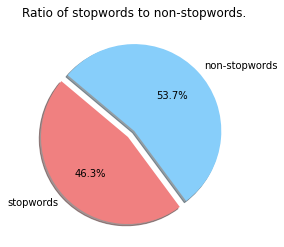

In [88]:
import matplotlib.pyplot as plt

all_words = len(full_text_words_with_stopwords)
non_stopwords_words = len(full_text_words_without_stopwords)
stopwords_words = all_words - non_stopwords_words

values = [stopwords_words, non_stopwords_words]
labels = ['stopwords', 'non-stopwords']
explode = (0.1, 0)
colors = ('lightcoral', 'lightskyblue')

plt.pie(values, explode, labels, colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Ratio of stopwords to non-stopwords.')

plt.show()

## 3. Conclusion

#### Results suggest that proper data cleaning is crucial in text analysis, as well as better understending of used libraries and methods. Besides that, research shown that presentation and promotion page of University of Gdańsk consists in 40% of stopwords, which does not carry the meaning. It might be beneficial to change content into more informative one.